In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
from scipy.optimize import curve_fit
import pandas as pd
import json
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

Equations for Regions of IV Curve

In [2]:
A = 4 * np.pi * (.03**2)
def electron_retardation(V, Vp, ne, Te):
    I_therm = c.elementary_charge * ne * A * np.sqrt((c.Boltzmann * Te) / (2 * np.pi * c.electron_mass))
    return I_therm * np.exp((c.elementary_charge * (V-Vp)) / (c.Boltzmann * Te))
def electron_saturation(V, Vp, ne, Te):
    I_therm = c.elementary_charge * ne * A * np.sqrt((c.Boltzmann * Te) / (2 * np.pi * c.electron_mass))
    return I_therm * np.pow(1 + ((c.elementary_charge * (V-Vp)) / (c.Boltzmann * Te)), 1)
def ion_sat(V, Vf, Vp, ne, Te, a):
    #point slope form to ensure that the IV curve is continuous at Vf
    return a * V - a * Vf + electron_retardation(Vf, Vp, ne, Te)

Piecewise Model for IV Curve

In [3]:
def IV_curve(V, Vf, Vp, ne, Te,a):
    if (V <= Vf):
        return ion_sat(V,Vf, Vp, ne, Te, a)
    elif(V > Vf and V <= Vp):
        return electron_retardation(V, Vp, ne, Te)
    else:
        return electron_saturation(V, Vp, ne, Te)
vec_IV_curve = np.vectorize(IV_curve)

In [4]:
def double_probe(V, n_e, T_e):
    I_therm = c.elementary_charge * n_e * A * np.sqrt((c.Boltzmann * T_e) / 2.657e-26)
    return I_therm * np.tanh((.5 * c.elementary_charge * V) / (2* c.Boltzmann * T_e))

Density vs. Altitude Data

In [5]:
df = pd.read_csv("../../Data/IRI_Data.txt", delim_whitespace = True, skiprows = 35, header = 1)
df.keys()

C:\Users\carso\AppData\Local\Temp\ipykernel_25048\3320511990.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../../Data/IRI_Data.txt", delim_whitespace = True, skiprows = 35, header = 1)


Index(['km', 'Ne/cm-3', 'Ne/NmF2', 'Tn/K', 'Ti/K', 'Te/K', 'O+', 'N+', 'H+',
       'He+', 'O2+', 'NO+', 'Clust', 'TEC', 't/%'],
      dtype='object')

400.0


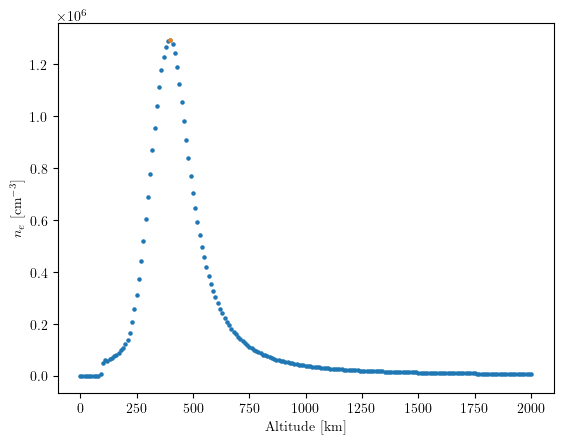

In [6]:
plt.scatter(df['km'], df['Ne/cm-3'], s = 5)
plt.scatter([df['km'][40]], [df['Ne/cm-3'][40]], s = 5)
plt.xlabel(r"$\rm Altitude ~[km]$")
plt.ylabel(r"$n_e~ [{\rm cm}^{-3}]$")
print(df['km'][40])

Sample IV curve using a specific Temperature/Density

Text(0.15, 0.8, '$\\begin{aligned}n_e &= 1294516~{\\rm cm}^{-3} \\\\ T_e &= 1350~{\\rm K}\\end{aligned}$')

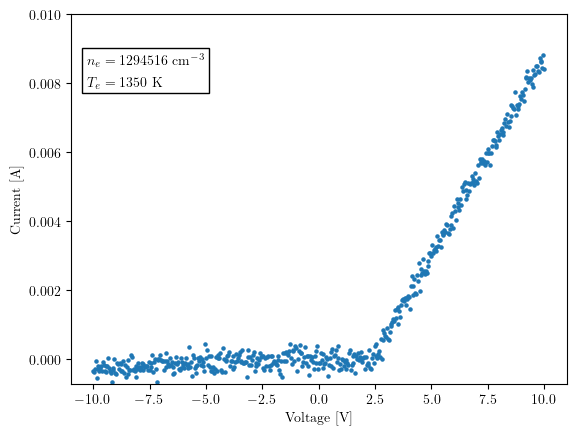

In [7]:
Vs = np.linspace(-10, 10, 512)
noise = np.random.normal(0,.0002, 512)
plt.scatter(Vs, vec_IV_curve(Vs, -2, 2.5, df["Ne/cm-3"][40] * 1e6,df["Te/K"][40],  .00003) + noise, s = 5)
plt.xlabel(r"$\rm Voltage~[V]$")
plt.ylabel(r"$\rm Current~[A]$")
plt.ylim(-7e-4, 1e-2)
string = (
    r"$\begin{aligned}"
    f"n_e &= {df["Ne/cm-3"][40]}~{{\\rm cm}}^{{-3}} \\\\ "
    f"T_e &= {df["Te/K"][40]}~{{\\rm K}}"
    r"\end{aligned}$"
)
plt.figtext(.15,.8, string, ha = "left", va = "top",
             bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))

Text(0.15, 0.8, '$\\begin{aligned}n_e &= 1294516~{\\rm cm}^{-3} \\\\ T_e &= 1350~{\\rm K}\\end{aligned}$')

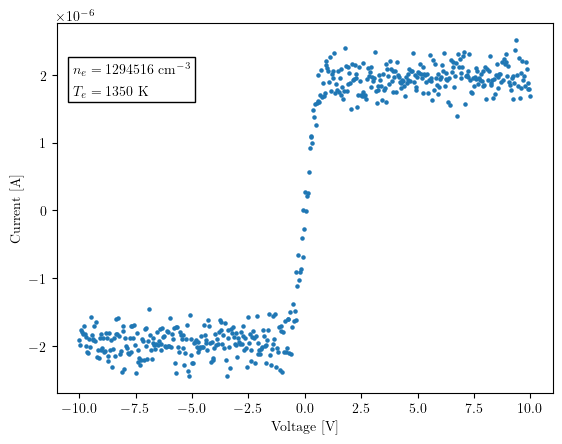

In [8]:
Vs = np.linspace(-10, 10, 512)
noise = np.random.normal(0,2e-7, 512)
plt.scatter(Vs, double_probe(Vs,  df["Ne/cm-3"][40] * 1e6,df["Te/K"][40]) + noise, s = 5)
plt.xlabel(r"$\rm Voltage~[V]$")
plt.ylabel(r"$\rm Current~[A]$")
#plt.ylim(-1e-4, 1e-3)
string = (
    r"$\begin{aligned}"
    f"n_e &= {df["Ne/cm-3"][40]}~{{\\rm cm}}^{{-3}} \\\\ "
    f"T_e &= {df["Te/K"][40]}~{{\\rm K}}"
    r"\end{aligned}$"
)
plt.figtext(.15,.8, string, ha = "left", va = "top",
             bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))

In [9]:
df_day = pd.read_csv("../../Data/density_vs_lat_day.txt", sep=r"\s+", skiprows = 31, header = 1)
print(df.keys())


Index(['km', 'Ne/cm-3', 'Ne/NmF2', 'Tn/K', 'Ti/K', 'Te/K', 'O+', 'N+', 'H+',
       'He+', 'O2+', 'NO+', 'Clust', 'TEC', 't/%'],
      dtype='object')


Text(0.5, 1.0, 'Density vs. Latitude Day')

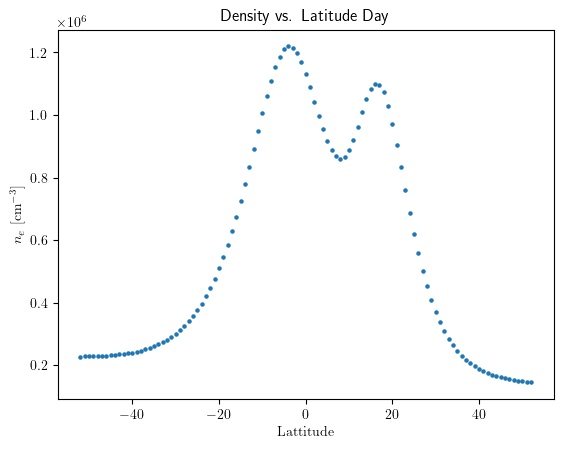

In [10]:
plt.scatter(df_day["GEOD"], df_day["Ne/cm-3"], s = 5)
plt.xlabel(r"$\rm Lattitude$")
plt.ylabel(r"$n_e~ [{\rm cm}^{-3}]$")
plt.title(r"Density vs. Latitude Day")

In [11]:
df_night = pd.read_csv("../../Data/density_vs_lat_night.txt", sep=r"\s+", skiprows = 31, header = 1)
print(df.keys())

Index(['km', 'Ne/cm-3', 'Ne/NmF2', 'Tn/K', 'Ti/K', 'Te/K', 'O+', 'N+', 'H+',
       'He+', 'O2+', 'NO+', 'Clust', 'TEC', 't/%'],
      dtype='object')


Text(0.5, 1.0, 'Density vs.Latitude Night')

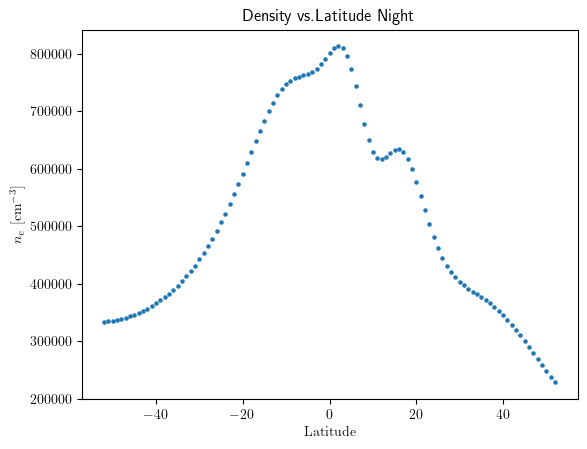

In [12]:
plt.scatter(df_night["GEOD"], df_night["Ne/cm-3"], s = 5)
plt.xlabel(r"$\rm Latitude$")
plt.ylabel(r"$n_e~ [{\rm cm}^{-3}]$")
plt.title(r"Density vs.Latitude Night")

In [13]:
data = []
for i in range(len(df_day["GEOD"])):
    Vs = np.linspace(-10, 10, 512)
    Vp = np.random.normal(1.5,.75, 1)[0]
    Vf = np.random.normal(-1, .75, 1)[0]
    n_e = df_day["Ne/cm-3"][i] * 1e6
    T_e = df_day["Te/K"][i]
    noise = np.random.normal(0,.0001, 512)
    entry = {
        "Index": 1,
        "Latitude": df_day["GEOD"][i],
        "Vp": Vp,
        "Vf": Vf,
        "ne": n_e,
        "Te": T_e,
        "V" : Vs.tolist(),
        "I" : (vec_IV_curve(Vs, Vf, Vp, n_e, T_e, .00001) + noise).tolist()
    }
    data.append(entry)
    
df_iv_curves = pd.DataFrame(data)
json_data = df_iv_curves.to_dict(orient="records")
with open("Simulated_IV_Curves_v1.json", "w") as f:
    json.dump(json_data, f, indent=2)


    
    

In [14]:
with open("Simulated_IV_Curves_v1.json") as f:
    loaded_data = json.load(f)

df_loaded = pd.DataFrame(loaded_data)
print(df_loaded.keys())

Index(['Index', 'Latitude', 'Vp', 'Vf', 'ne', 'Te', 'V', 'I'], dtype='object')


In [15]:
# n = 0
# for n in range(0, 100, 5):
#     plt.scatter(df_loaded["V"][n], df_loaded["I"][n], s = 4)
#     string = (
#     r"$\begin{aligned}"
#     f"&n_e = {df_loaded["ne"][n] * 1e-6}~{{\\rm cm}}^{{-3}} \\\\ "
#     f"&T_e = {df_loaded["Te"][n]}~{{\\rm K}} \\\\"
#     f" &\\text{{Latitude}} = {df_loaded["Latitude"][n]}^{{\\circ}}"
#     r"\end{aligned}$"
#     )
#     plt.figtext(.15,.8, string, ha = "left", va = "top",
#              bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))
#     plt.ylim(min(df_loaded["I"][n]), max(df_loaded["I"][n]))
#     plt.vlines([df_loaded["Vf"][n], df_loaded["Vp"][n]], -3,1)
#     plt.show()

In [16]:
data = []
for i in range(len(df_day["GEOD"])):
    Vs = np.linspace(-10, 10, 512)
    Vp = np.random.normal(1.5,.75, 1)[0]
    Vf = np.random.normal(-1, .75, 1)[0]
    n_e = df_day["Ne/cm-3"][i] * 1e6
    T_e = df_day["Te/K"][i]
    noise = np.random.normal(0, 1.25e-7, 512)
    entry = {
        "Index": 1,
        "Latitude": df_day["GEOD"][i],
        "Vp": Vp,
        "Vf": Vf,
        "ne": n_e,
        "Te": T_e,
        "V" : Vs.tolist(),
        "I" : (double_probe(Vs,n_e, T_e) + noise).tolist()
    }
    data.append(entry)
    
df_iv_curves = pd.DataFrame(data)
json_data = df_iv_curves.to_dict(orient="records")
with open("Simulated_Double_IV_Curves_v1.json", "w") as f:
    json.dump(json_data, f, indent=2)

In [17]:
with open("Simulated_Double_IV_Curves_v1.json") as f:
    loaded_data = json.load(f)

df_loaded2 = pd.DataFrame(loaded_data)
print(df_loaded2.keys())

Index(['Index', 'Latitude', 'Vp', 'Vf', 'ne', 'Te', 'V', 'I'], dtype='object')


Fitting double sweep

C:\Users\carso\AppData\Local\Temp\ipykernel_25048\229626103.py:2: RuntimeWarning: invalid value encountered in sqrt
  I_therm = c.elementary_charge * n_e * A * np.sqrt((c.Boltzmann * T_e) / 2.657e-26)


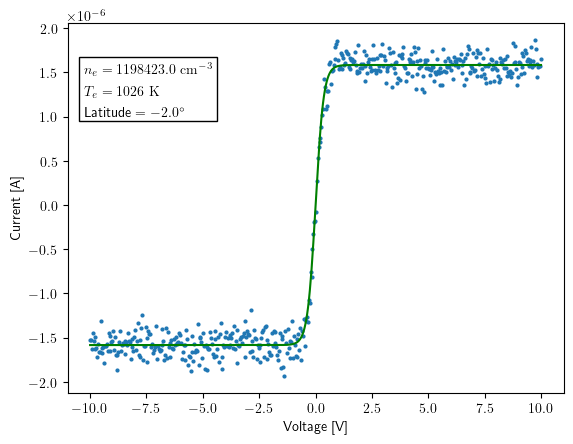

Sweep =  50
Density =  1189491.4408185724  ±  22968.81840174985 Temp =  1038.598863199614  ±  40.98486407405694


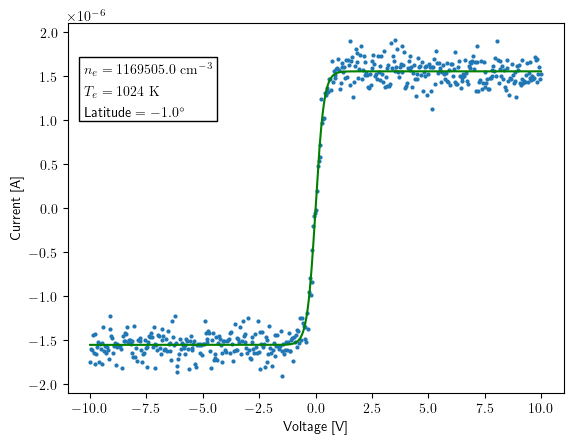

Sweep =  51
Density =  1146754.4263495575  ±  23569.44286705132 Temp =  1075.005054309036  ±  45.19021712441625


In [ ]:
for n in range(50,52, 1):
    popt, pcov = curve_fit(double_probe, df_loaded2["V"][n],df_loaded2["I"][n],p0 = (4.5e11, 2250))
    #p0=(df_loaded2["ne"][n],df_loaded2["Te"][n])
    p_sigma = np.sqrt(np.diag(pcov))
    plt.scatter(df_loaded2["V"][n], df_loaded2["I"][n], s = 4)
    plt.plot(df_loaded2["V"][n], double_probe(np.array(df_loaded2["V"][n]), *popt), c = "g")
    string = (
    r"$\begin{aligned}"
    f"&n_e = {df_loaded2["ne"][n] * 1e-6}~{{\\rm cm}}^{{-3}} \\\\ "
    f"&T_e = {df_loaded2["Te"][n]}~{{\\rm K}} \\\\"
    f" &\\text{{Latitude}} = {df_loaded2["Latitude"][n]}^{{\\circ}}"
    r"\end{aligned}$"
    )
    plt.figtext(.15,.8, string, ha = "left", va = "top",
             bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))
    plt.xlabel(r"Voltage [V]")
    plt.ylabel("Current [A]")
    #plt.savefig("Figures/ex_double_IV.png")
    plt.show()
    print("Sweep = ", n)
    print("Density = ", popt[0] * 1e-6, " ± ", p_sigma[0] * 1e-6, "Temp = ", popt[1]," ± ", p_sigma[1])
    

Fitting single sweep

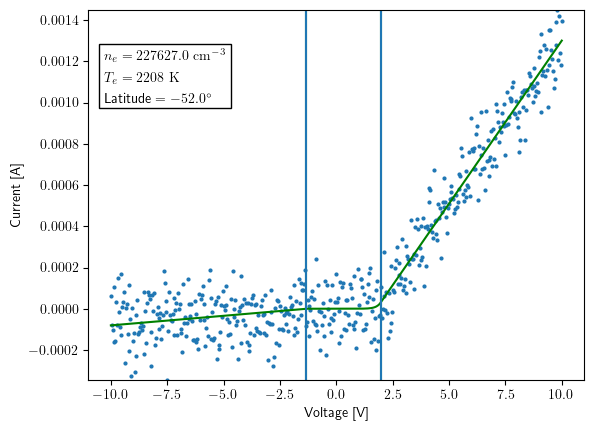

Density =  227627.0  ±  1.6692577774852442e-12 Temp =  2207.999999879266  ±  86.19396630355972


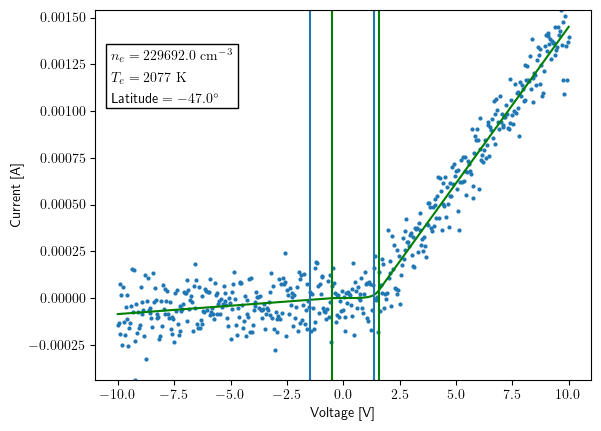

Density =  271732.7387334234  ±  1.9028151782831544e-12 Temp =  2811.135746440879  ±  92.20506877397351


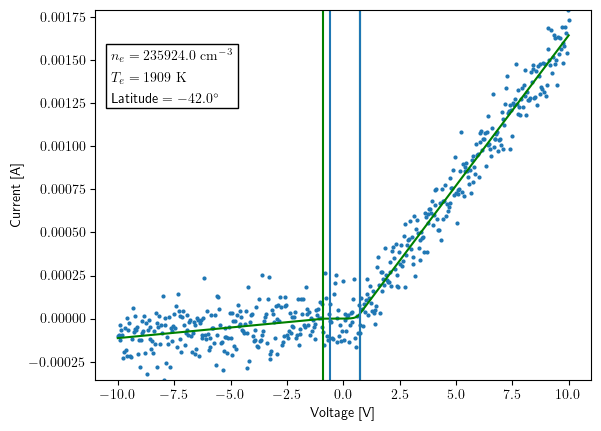

Density =  221705.19224938808  ±  7.323138969913377e-13 Temp =  1723.1584765351251  ±  47.14690042527095


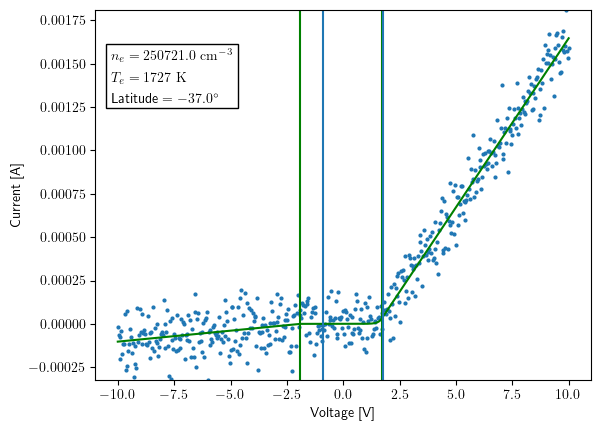

Density =  258754.1838229959  ±  7.648433562497293e-13 Temp =  1878.9524835292736  ±  52.72666239646983


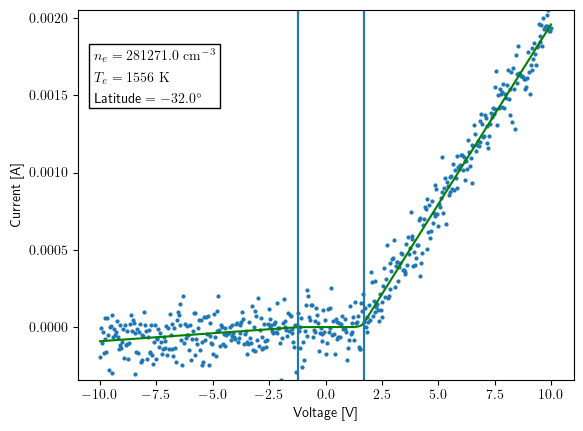

Density =  281271.0  ±  4.19215911503997e-13 Temp =  1555.999999183586  ±  37.920849257388134


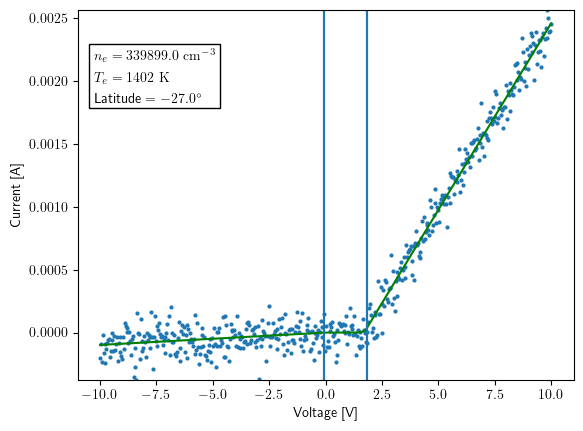

Density =  339899.0  ±  2.2620924933821456e-13 Temp =  1401.999912574793  ±  27.439598032671537


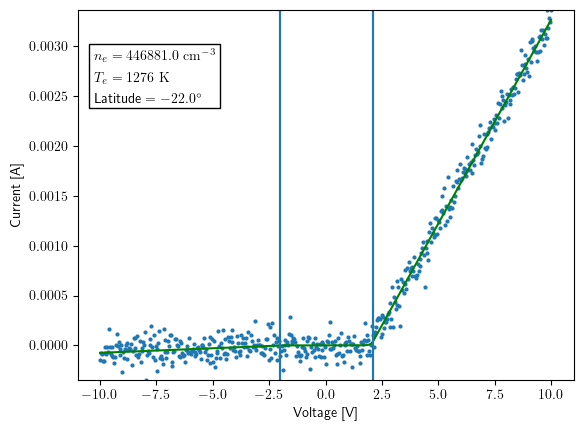

Density =  446881.0  ±  1.0632548289315096e-13 Temp =  1275.9999657750895  ±  18.629924145358075


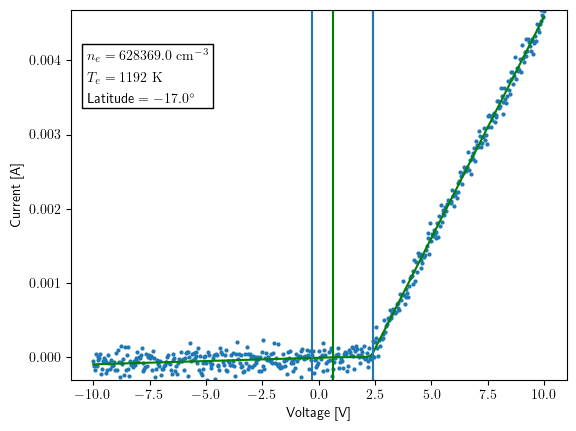

Density =  665675.8602087637  ±  5.635047425519991e-14 Temp =  1325.9451160696908  ±  14.155126171974477


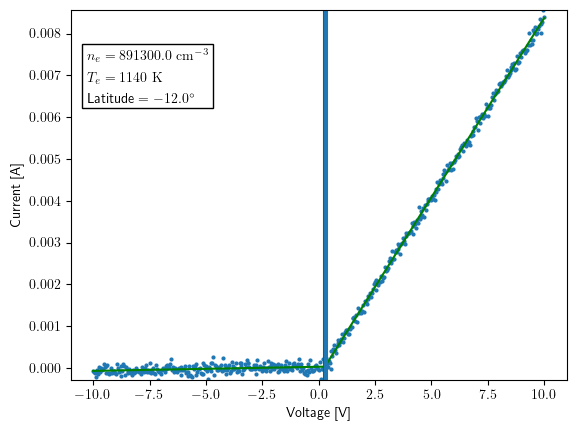

Density =  849892.9758410517  ±  1.2468007526436316e-14 Temp =  1048.1630665833998  ±  5.055556420595724


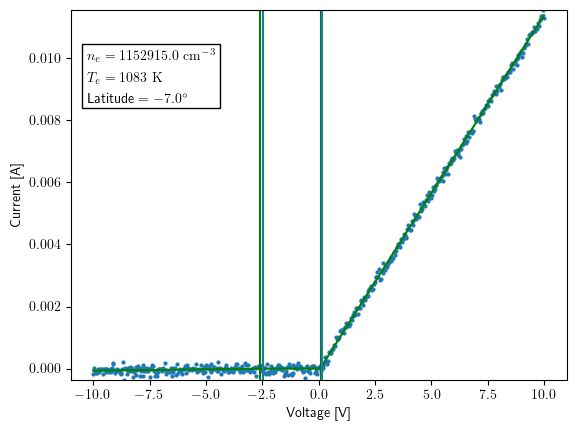

Density =  788390.2337020541  ±  2.461146061351759e-15 Temp =  504.49256821423745  ±  1.9231914982355092


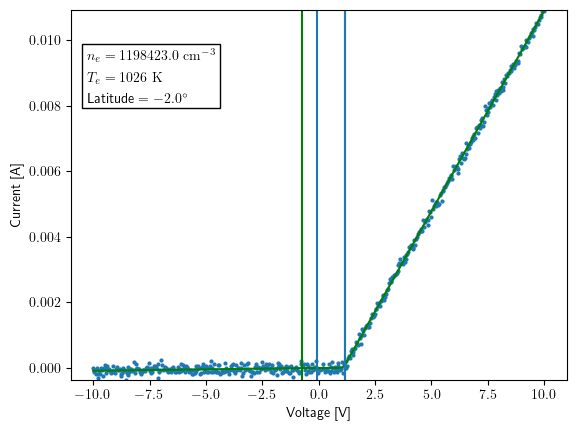

Density =  1198663.4382682964  ±  7.424991913250358e-15 Temp =  1023.3368821423528  ±  4.349893926784364


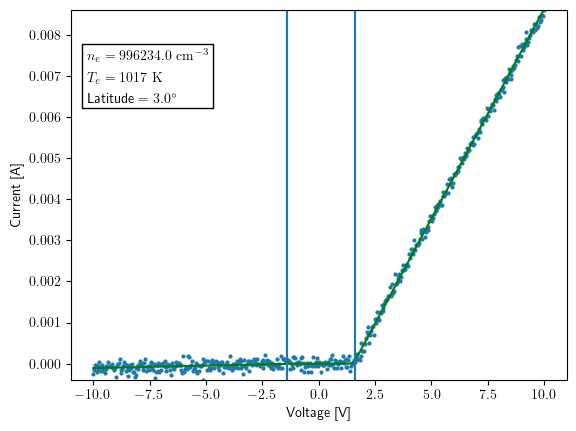

Density =  996234.0  ±  1.134243522633169e-14 Temp =  1016.9999970045416  ±  5.557288976455766


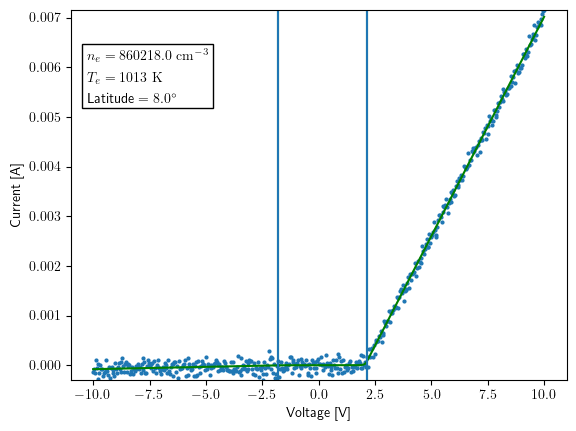

Density =  860218.0  ±  1.649882802100898e-14 Temp =  1012.9999213869403  ±  7.007876322936053


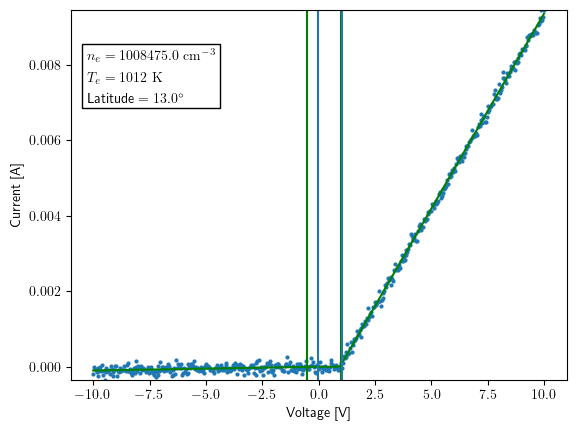

Density =  894815.2732364207  ±  6.5292927361623324e-15 Temp =  799.673494949193  ±  3.653741319218374


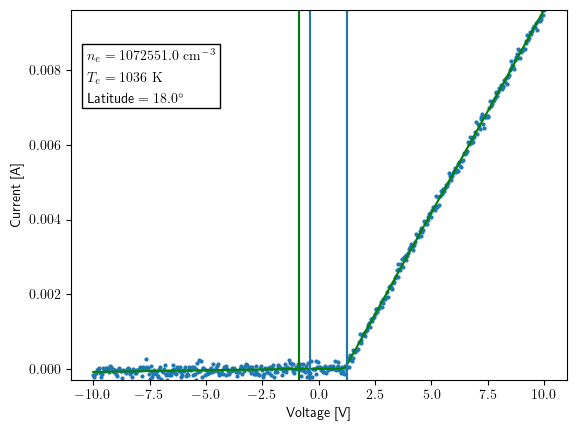

Density =  1033441.9033965656  ±  8.296001846957929e-15 Temp =  962.4203538143267  ±  4.455320980439283


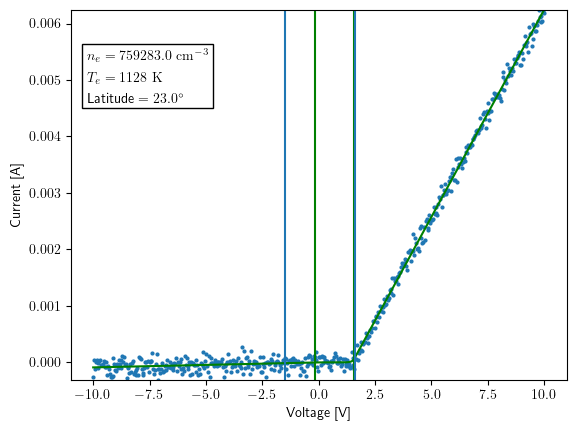

Density =  755889.4212974095  ±  2.6077227835627513e-14 Temp =  1131.7499946271464  ±  8.711952785186604


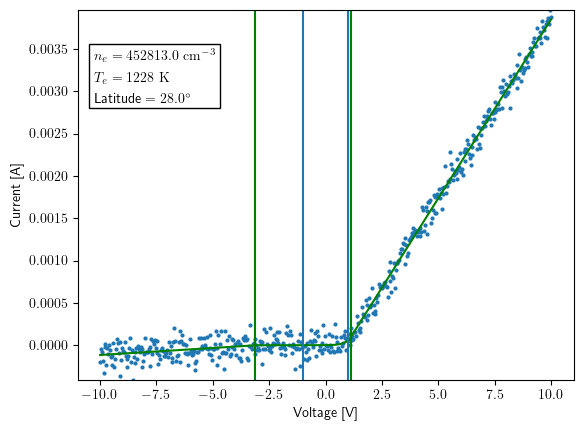

Density =  693567.4714127962  ±  2.878973582819782e-13 Temp =  2872.195782228801  ±  34.8456257002202


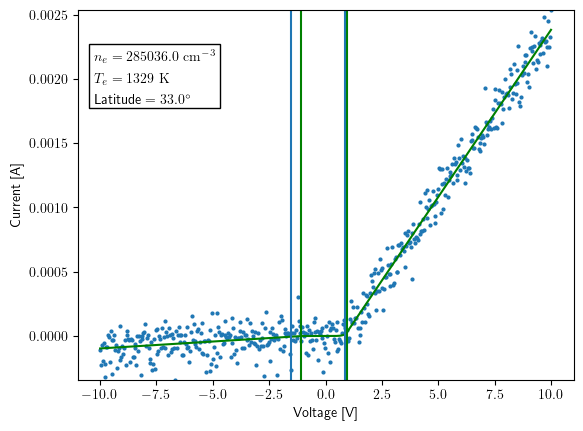

Density =  302850.75  ±  2.7168231016718925e-13 Temp =  1448.209841168844  ±  28.423652510331284


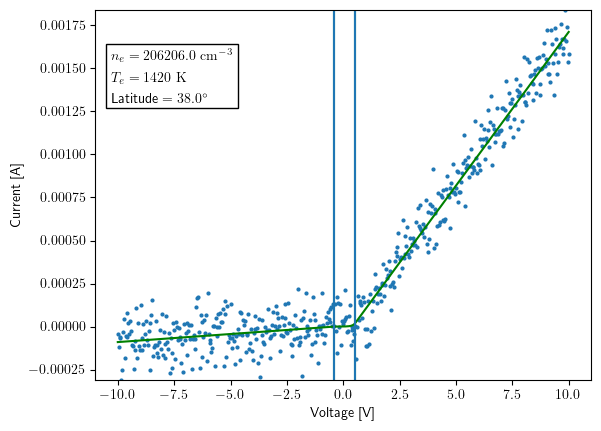

Density =  206206.0  ±  5.055388829632052e-13 Temp =  1419.9999778553683  ±  36.725131827942135


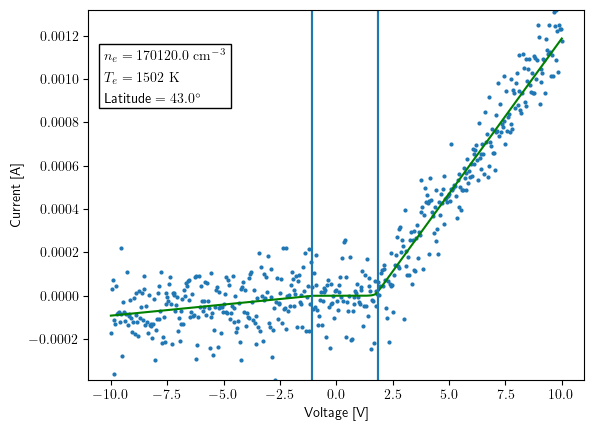

Density =  170120.0  ±  1.100547146474882e-12 Temp =  1501.9999988597908  ±  62.374005520552934


In [19]:
for n in range(0, 100, 5):
    popt, pcov = curve_fit(vec_IV_curve, df_loaded["V"][n],df_loaded["I"][n],
                           p0=(df_loaded["Vf"][n], df_loaded["Vp"][n], df_loaded["ne"][n],df_loaded["Te"][n], .00001),
                           bounds = ((-4,-2.5,10000,500,.000009),(2,4.5,np.inf, 4000,.00005)))
    p_sigma = np.sqrt(np.diag(pcov))
    plt.scatter(df_loaded["V"][n], df_loaded["I"][n], s = 4)
    plt.plot(df_loaded["V"][n], vec_IV_curve(np.array(df_loaded["V"][n]), *popt), c = "g")
    string = (
    r"$\begin{aligned}"
    f"&n_e = {df_loaded["ne"][n] * 1e-6}~{{\\rm cm}}^{{-3}} \\\\ "
    f"&T_e = {df_loaded["Te"][n]}~{{\\rm K}} \\\\"
    f" &\\text{{Latitude}} = {df_loaded["Latitude"][n]}^{{\\circ}}"
    r"\end{aligned}$"
    )
    plt.figtext(.15,.8, string, ha = "left", va = "top",
             bbox=dict(facecolor = 'white',edgecolor='black', pad = 3.5))
    plt.ylim(min(df_loaded["I"][n]), max(df_loaded["I"][n]))
    plt.vlines([popt[0], popt[1]], -3,1, colors = "g")
    plt.vlines([df_loaded["Vf"][n], df_loaded["Vp"][n]], -3,1)
    plt.xlabel(r"Voltage [V]")
    plt.ylabel("Current [A]")
    plt.show()
    
    print("Density = ", popt[2] * 1e-6, " ± ", p_sigma[2] * 1e-6, "Temp = ", popt[3]," ± ", p_sigma[3])